# 6.4 SUPERVISED MACHINE LEARNING - REGERESSION
** **
**SCRIPT CONTENTS:**

      1) IMPORTING LIBRARIES & FILES
      2) DATA CLEANING
      3) HYPOTHESES TESTING
         
         A) Hypothesis 1: An increase in revenue will result in a corresponding increase in profit.
              - Data prep for regression analysis
              - Regression Analysis
         
         B) Hypothesis 2: The industries performances has no significant difference before and during pandemic.
              - Data prep for regression analysis
              - Regression Analysis  

## IMPORTING LIBRARIES & FILES
** **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Command to prompts matplotlib visuals to appear in the notebook 

%matplotlib inline 

In [3]:
# Document File Location

path = r'C:\Users\G\03-2023 The World Largest Public Companies (Pre-Post Pandemic)'

In [4]:
# Import files

# Merged Dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Clean Global Public Companies Growth Rate3.csv'), index_col = False)

## DATA CLEANING
** **
The merged dataset is clean but will run some check points to verify consistency and detected any possible missed anomilies before proceeding.

In [5]:
# Check dataframe dimension

df.shape

(7021, 12)

In [6]:
# Check Column Names

df.columns

Index(['Year', 'Country', 'Industry', 'Sales', 'Assets', 'Profits',
       'Market Value', 'Sales Growth', 'Assets Growth', 'Profits Growth',
       'Market Value Growth', 'Region'],
      dtype='object')

In [7]:
# Checking  heads

df.head(20)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,Region
0,2009,Australia,Banking,135900,1772680,14100,101640,9.323466,6.317848,-10.702977,-46.676460,Oceanic
1,2009,Australia,Business Services & Supplies,4610,5640,690,4090,14.392060,12.574850,-46.511628,-70.405210,Oceanic
2,2009,Australia,Chemicals,7470,12290,910,5280,52.448980,131.886793,111.627907,-37.588652,Oceanic
3,2009,Australia,Conglomerates,31870,35430,1000,12960,288.185140,245.321637,49.253731,-32.675325,Oceanic
4,2009,Australia,Diversified Financials,58780,457940,1460,39550,11.389047,6.947850,-88.795088,-67.897727,Oceanic
5,2009,Australia,Drugs & Biotechnology,3400,4340,670,14120,25.925926,26.162791,45.652174,-24.853646,Oceanic
6,2009,Australia,Food Markets,54550,17570,1750,22510,23.556059,21.172414,41.129032,-37.332962,Oceanic
7,2009,Australia,"Food, Drink & Tobacco",7040,11170,380,10980,-4.087193,-6.448911,-65.137615,-32.138443,Oceanic
8,2009,Australia,"Hotels, Restaurants & Leisure",1920,7100,3410,2390,-59.663866,-41.419142,459.016393,-83.927371,Oceanic
9,2009,Australia,Insurance,16950,51820,1030,16560,1.985560,-1.744407,-52.314815,-34.415842,Oceanic


In [8]:
# Checking  heads

df.tail(20)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,Region
7001,2022,United States of America,Consumer Durables,551746,809500,47167,2057813,-11.814469,-19.779366,26.680633,-0.571116,NorthAmerica
7002,2022,United States of America,Diversified Financials,1070829,15631532,281591,3531781,12.553448,14.000841,61.623055,14.199514,NorthAmerica
7003,2022,United States of America,Drugs & Biotechnology,1561635,1551931,136557,2773479,16.459360,6.806829,124.367842,13.199805,NorthAmerica
7004,2022,United States of America,Food Markets,367500,133923,4481,121131,13.324494,4.587306,44.269156,24.946878,NorthAmerica
7005,2022,United States of America,"Food, Drink & Tobacco",548237,799372,57422,1431480,7.258748,-18.916523,-2.914821,5.728942,NorthAmerica
7006,2022,United States of America,Health Care Equipment & Services,345161,604062,50945,1295525,12.490019,5.947723,30.494365,-2.835455,NorthAmerica
7007,2022,United States of America,"Hotels, Restaurants & Leisure",131831,343720,-311,546481,20.467318,-6.112058,-98.178837,-18.945108,NorthAmerica
7008,2022,United States of America,IT Software & Services,902299,1600521,218909,5997883,25.709003,11.794067,46.364767,-15.417380,NorthAmerica
7009,2022,United States of America,Insurance,949974,3673566,82700,1219609,5.725234,-2.593096,43.656198,14.986942,NorthAmerica
7010,2022,United States of America,Materials,282090,337931,36822,375086,77.984870,28.116268,334.426616,24.293265,NorthAmerica


In [9]:
# Checking for Missing values

df.isnull().sum()

Year                   0
Country                0
Industry               0
Sales                  0
Assets                 0
Profits                0
Market Value           0
Sales Growth           0
Assets Growth          0
Profits Growth         0
Market Value Growth    0
Region                 0
dtype: int64

In [10]:
# Checking for Duplicate values for all dataframes

df_dups = df[df.duplicated()]
df_dups

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth,Region


In [11]:
df.describe()

,Year,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
count,7021.000000,7.021000e+03,7.021000e+03,7021.000000,7.021000e+03,7021.000000,7021.000000,7021.000000,7021.000000
mean,2015.444524,7.449459e+04,3.380922e+05,5466.495371,9.504907e+04,27.501895,27.851808,54.033316,35.132825
std,3.970971,1.637836e+05,1.394411e+06,16041.276553,2.692136e+05,427.315677,300.863603,1437.343007,503.596190
min,2009.000000,-6.620000e+03,8.520000e+02,-92720.000000,1.790000e+02,-425.185185,-99.769076,-30150.000000,-98.703219
25%,2012.000000,8.270000e+03,1.606300e+04,527.000000,1.035100e+04,-7.163573,-3.584977,-33.333333,-17.812497
50%,2015.000000,2.066800e+04,4.501300e+04,1360.000000,2.561800e+04,3.256265,4.838710,1.290323,4.057089
75%,2019.000000,6.620800e+04,1.647860e+05,4303.000000,7.198200e+04,16.459360,16.552982,33.138736,29.382895
max,2022.000000,2.466591e+06,3.616723e+07,296065.000000,7.091153e+06,29378.125000,14993.617670,58433.333330,35079.891420


## HYPOTHESES TESTING
** **

###  A) Hypothesis 1: _An increase in revenue will result in a corresponding increase in profit._

`VARIABLES TO BE TESTED:`

X = Sales Growth  :  y = Profit Growth

#### DATA PREP FOR REGRESSION ANALYSIS

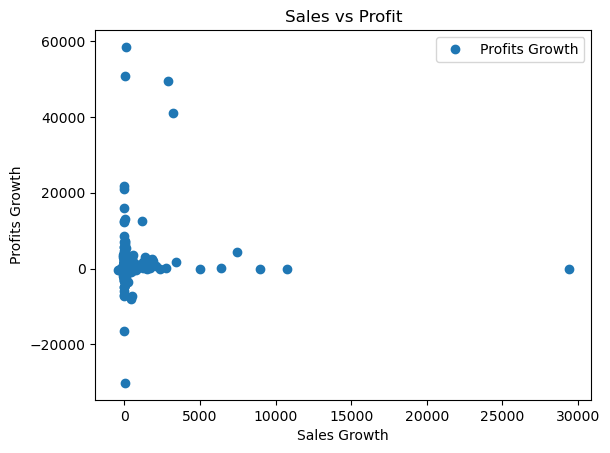

In [12]:
# Creating a  scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Sales Growth', y = 'Profits Growth', style = 'o')
plt.title('Sales vs Profit')  
plt.xlabel('Sales Growth')  
plt.ylabel('Profits Growth')  
plt.show()

In [13]:
# Reshape the variables and put them into separate objects.

X = df['Sales Growth'].values.reshape(-1,1)
y = df['Profits Growth'].values.reshape(-1,1)

In [14]:
X

array([[ 9.32346553],
       [14.39205955],
       [52.44897959],
       ...,
       [34.2074338 ],
       [23.53900839],
       [ 6.38340989]])

In [15]:
y

array([[ -10.70297657],
       [ -46.51162791],
       [ 111.627907  ],
       ...,
       [-332.6759582 ],
       [  17.01706835],
       [  27.00631199]])

In [16]:
# Splitting data into a training set and a test set with the use of test_train_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### REGRESSION ANALYSIS: 

**_CONDUCT TEST SET PREDICTION MODEL_**

In [17]:
# Creating a regression object

regression1 = LinearRegression()

In [18]:
# Fit the regression object onto the training set

regression1.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression1.predict(X_test)

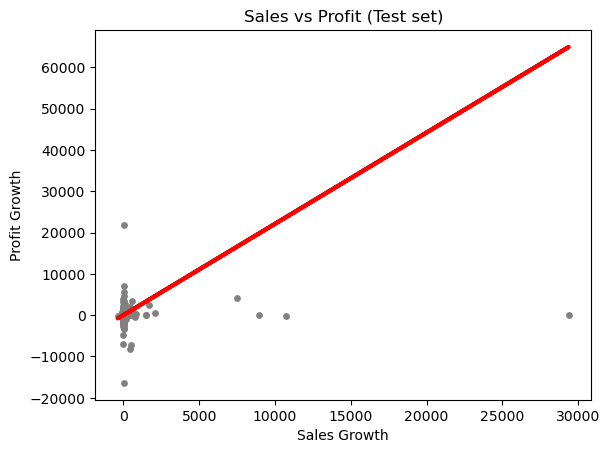

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'grey', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales Growth')
plot_test.ylabel('Profit Growth')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r1 = r2_score(y_test, y_predicted)

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r1)

Slope: [[2.2093211]]
Mean squared error:  3172430.8463232955
R2 score:  -4.203090133729778


**NOTE:** 
The `RMSE` at 3172430.8463232955 suggest that the data points may have relatively small errors on average, however the `R3 score` at -4.203090133729778 indicates that the model prediction may not fully capture fully variablility in the output.

In [23]:
y_predicted

array([[  77.59307761],
       [  13.78422593],
       [  69.29652126],
       ...,
       [1146.946462  ],
       [  58.09071162],
       [ -59.4837342 ]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,66.751918,77.593078
1,-9.582389,13.784226
2,66.815145,69.296521
3,-14.313346,21.410754
4,-5.068226,43.593297
5,166.619916,277.065965
6,-92.187500,-159.875532
7,-44.415584,-48.576272
8,-22.344322,20.167856
9,-96.000000,53.607900


**_COMPARISON OF TEST SET TO ACTUAL PREDICTION MODEL_**

In [25]:
# Predict
# This is predicting X_train!

y_predicted_train = regression1.predict(X_train) 

In [26]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_train, y_predicted_train)
r1 = r2_score(y_train, y_predicted_train)

In [27]:
# Print the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r1)

Slope: [[2.2093211]]
Mean squared error:  2539816.125768975
R2 score:  0.05536484230874272


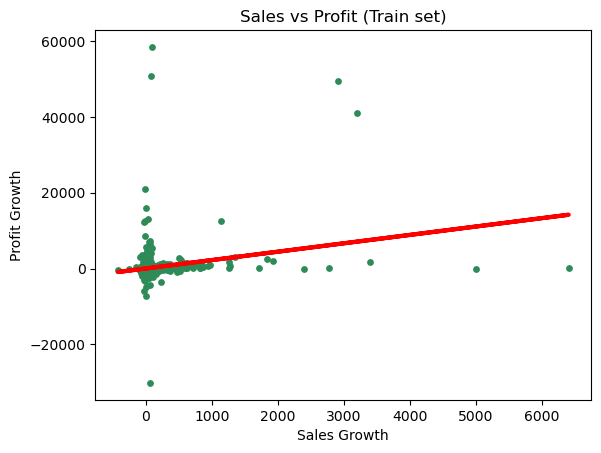

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color ='seagreen', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('Sales vs Profit (Train set)')
plot_test.xlabel('Sales Growth')
plot_test.ylabel('Profit Growth')
plot_test.show()

**INTERPRETATION:** The model's noticeable improvements, resulting from parameter adjustments, are evident compared to the test set. Lower MSE values signify enhanced performance, indicating smaller prediction errors on average. Moreover, the significantly lower R2 score indicates that the model captures only around 5.5% of the variability in the output variable, indicating a `poor fit` to the data.

****
###  b) Hypothesis 2: _The industries performances has no significant difference before and during pandemic._

#### DATA PREP FOR REGRESSION ANALYSIS

**YEAR vs SALES**

`VARIABLES TO BE TESTED:`

X2 = Year  :  y2 = Sales Growth

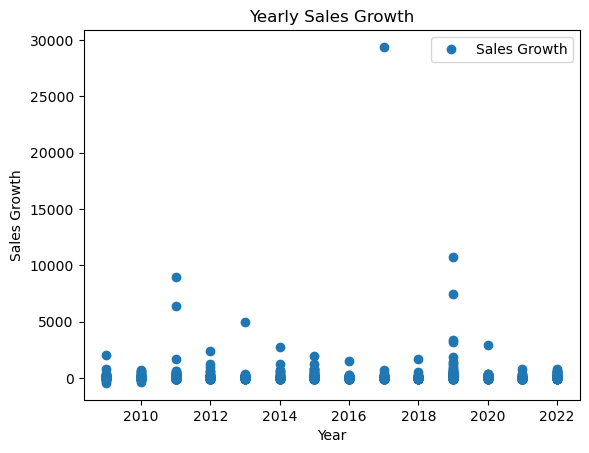

In [29]:
# Creating a  scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y = 'Sales Growth', style = 'o')
plt.title('Yearly Sales Growth')  
plt.xlabel('Year')  
plt.ylabel('Sales Growth')  
plt.show()

In [30]:
# Reshape the variables and put them into separate objects.

X2 = df['Year'].values.reshape(-1,1)
y2 = df['Sales Growth'].values.reshape(-1,1)

In [31]:
X2

array([[2009],
       [2009],
       [2009],
       ...,
       [2022],
       [2022],
       [2022]], dtype=int64)

In [32]:
y2

array([[ 9.32346553],
       [14.39205955],
       [52.44897959],
       ...,
       [34.2074338 ],
       [23.53900839],
       [ 6.38340989]])

In [33]:
# Splitting data into a training set and a test set with the use of test_train_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [34]:
# Regression Analysis
# Creating a regression object

regression2 = LinearRegression()

In [35]:
# Fit the regression object onto the training set

regression2.fit(X2_train, y2_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y2_predicted = regression2.predict(X2_test)

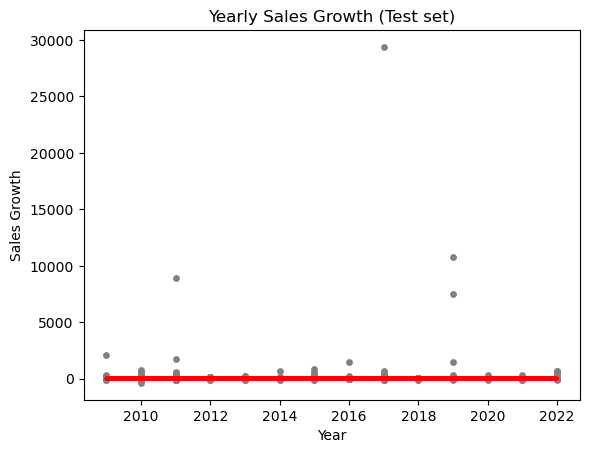

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color = 'grey', s = 15)
plot_test.plot(X2_test, y2_predicted, color = 'red', linewidth = 3)
plt.title('Yearly Sales Growth (Test set)')  
plt.xlabel('Year')  
plt.ylabel('Sales Growth')  
plt.show()

In [38]:
# Create objects that contain the model summary statistics

rmse2 = mean_squared_error(y2_test, y2_predicted) 
r2 = r2_score(y2_test, y2_predicted)

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2)

Slope: [[0.08710966]]
Mean squared error:  537380.974846612
R2 score:  -0.0008436573363206357


**NOTE:** With results of  `large mean square error` and `low R2 score`, the performance of the model can be considered relatively poor.

In [40]:
y2_predicted

array([[20.78503308],
       [20.95925239],
       [20.78503308],
       ...,
       [20.61081377],
       [20.52370411],
       [21.1334717 ]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,22.957746,20.785033
1,-5.923909,20.959252
2,19.202495,20.785033
3,-2.471931,21.046362
4,7.568503,20.959252
5,113.244707,21.656130
6,-84.527132,21.481910
7,-34.150000,20.697923
8,-3.034501,21.220581
9,12.101390,20.610814


In [42]:
# Predict
# This is predicting X_train!

y2_predicted_train = regression2.predict(X2_train) 

In [43]:
# Create objects that contain the model summary statistics

rmse2 = mean_squared_error(y2_train, y2_predicted_train)
r2b = r2_score(y2_train, y2_predicted_train)

In [44]:
# Print the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2b)

Slope: [[0.08710966]]
Mean squared error:  30496.6998981591
R2 score:  3.9413606685023694e-06


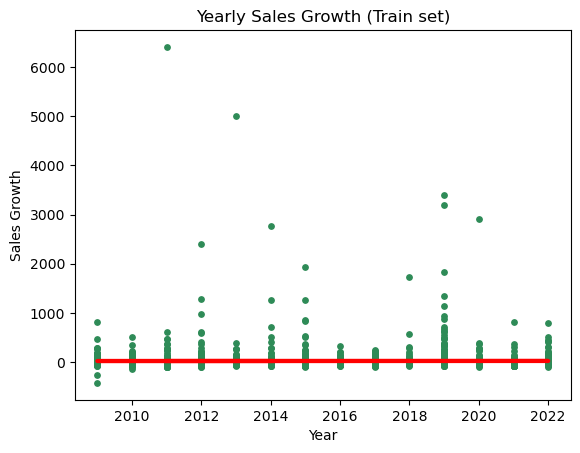

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X2_train, y2_train, color ='seagreen', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color = 'red', linewidth = 3)
plt.title('Yearly Sales Growth (Train set)')  
plt.xlabel('Year')  
plt.ylabel('Sales Growth')  
plt.show()

**INTERPRETATION:** Overall, comparing these results, the previous model had better performance. It had a smaller mean squared error, indicating more accurate predictions, and a slightly higher R2 score, suggesting a slightly better fit to the data. However, it's important to note that `both sets of results indicate relatively poor performance overall`, and further improvements may be necessary to enhance the model's predictive capabilities.

**YEAR vs. ASSETS GROWTH**

_Assets measures the increase in the total value of assets owned by a company or industry, assuming the expansion of productive capacity and investment in physical resources. Referencing stockopedia: https://www.stockopedia.com/ratios/asset-growth-ttm-5122/_

`VARIABLES TO BE TESTED:`

X3 = Year  :  y3 = Assets

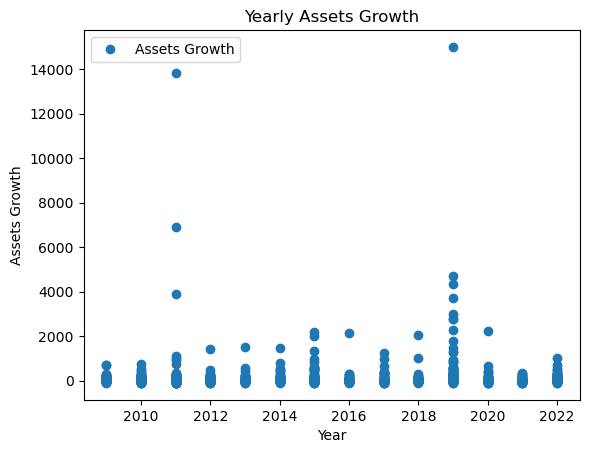

In [46]:
# Creating a  scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y = 'Assets Growth', style = 'o')
plt.title('Yearly Assets Growth')  
plt.xlabel('Year')  
plt.ylabel('Assets Growth')  
plt.show()

In [47]:
# Reshape the variables and put them into separate objects.

X3 = df['Year'].values.reshape(-1,1)
y3 = df['Assets Growth'].values.reshape(-1,1)

In [48]:
X3

array([[2009],
       [2009],
       [2009],
       ...,
       [2022],
       [2022],
       [2022]], dtype=int64)

In [49]:
y3

array([[  6.31784759],
       [ 12.5748503 ],
       [131.8867925 ],
       ...,
       [  1.47529033],
       [  8.30724613],
       [ 15.58033775]])

In [50]:
# Splitting data into a training set and a test set with the use of test_train_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

In [51]:
# Regression Analysis
# Creating a regression object

regression3 = LinearRegression()

In [52]:
# Fit the regression object onto the training set

regression3.fit(X3_train, y3_train)

LinearRegression()

In [53]:
# Predict the values of y using X.

y3_predicted = regression3.predict(X3_test)

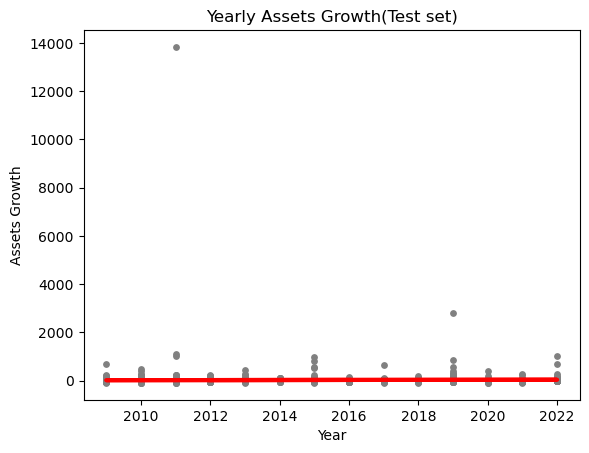

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X3_test, y3_test, color = 'grey', s = 15)
plot_test.plot(X3_test, y3_predicted, color = 'red', linewidth = 3)
plt.title('Yearly Assets Growth(Test set)')  
plt.xlabel('Year')  
plt.ylabel('Assets Growth')  
plt.show()

In [55]:
# Create objects that contain the model summary statistics

rmse3 = mean_squared_error(y3_test, y3_predicted) 
r3 = r2_score(y3_test, y3_predicted)

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r3)

Slope: [[1.3566867]]
Mean squared error:  99856.74752838296
R2 score:  -0.0013392264635587736


**NOTE:** The `RMSE` at 99,856.74752838296 indicates that the model's predictions have relatively small errors on average. However, the `negative R2 score` of of -0.0013392264635587736, suggests that the model does not provide a good fit to the data and may not explain any significant relationships.

In [57]:
y3_predicted

array([[25.00957977],
       [27.72295317],
       [25.00957977],
       ...,
       [22.29620636],
       [20.93951966],
       [30.43632658]])

In [58]:
# Create a dataframe comparing the actual and predicted values of y

data3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data3.head(30)

,Actual,Predicted
0,15.666306,25.009580
1,-9.780766,27.722953
2,17.698562,25.009580
3,4.676417,29.079640
4,-3.884016,27.722953
5,45.320042,38.576447
6,-78.743018,35.863073
7,-34.714475,23.652893
8,-4.062955,31.793013
9,14.288331,22.296206


In [59]:
# Predict
# This is predicting X_train!

y3_predicted_train = regression3.predict(X3_train) 

In [60]:
# Create objects that contain the model summary statistics

rmse3 = mean_squared_error(y3_train, y3_predicted_train)
r3 = r2_score(y3_train, y3_predicted_train)

In [61]:
# Print the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r3)

Slope: [[1.3566867]]
Mean squared error:  86513.5059087285
R2 score:  0.00033689691586369364


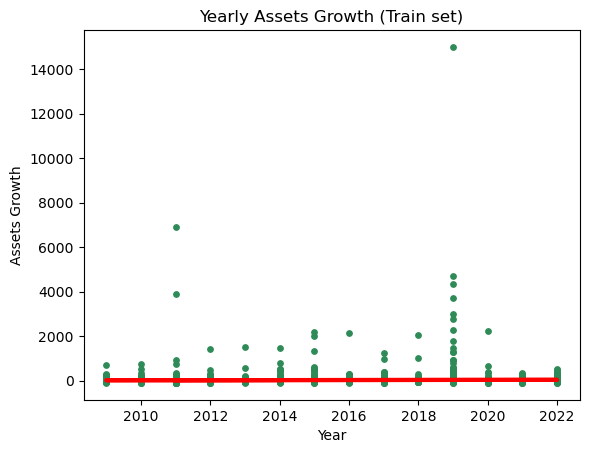

In [62]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X3_train, y3_train, color ='seagreen', s = 15)
plot_test.plot(X3_train, y3_predicted_train, color = 'red', linewidth = 3)
plt.title('Yearly Assets Growth (Train set)')  
plt.xlabel('Year')  
plt.ylabel('Assets Growth')  
plt.show()

**INTERPRETATION:** Based on the given results, the `model does not perform well`. The high mean squared error and the very low R2 score suggest that the model's predictions are not accurate and it fails to explain the relationship between the variables. This concludes that there may be other factors that could influence the companies asset growth.

**YEAR vs. PROFITS GROWTH**

`VARIABLES TO BE TESTED:`

X4 = Year  :  y4 = Profits

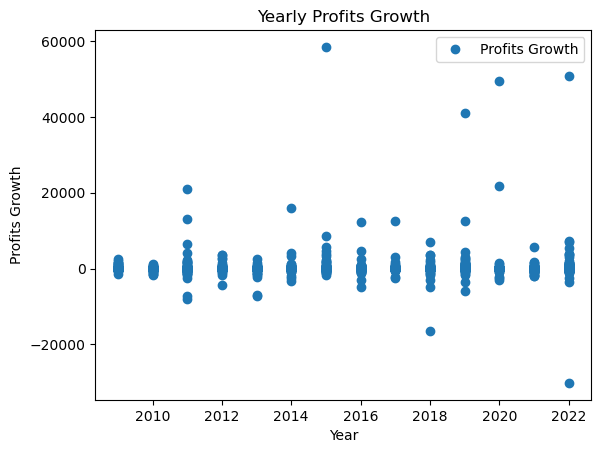

In [63]:
# Creating a  scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y = 'Profits Growth', style = 'o')
plt.title('Yearly Profits Growth')  
plt.xlabel('Year')  
plt.ylabel('Profits Growth')  
plt.show()

In [64]:
# Reshape the variables and put them into separate objects.

X4 = df['Year'].values.reshape(-1,1)
y4 = df['Profits Growth'].values.reshape(-1,1)

In [65]:
X4

array([[2009],
       [2009],
       [2009],
       ...,
       [2022],
       [2022],
       [2022]], dtype=int64)

In [66]:
y4

array([[ -10.70297657],
       [ -46.51162791],
       [ 111.627907  ],
       ...,
       [-332.6759582 ],
       [  17.01706835],
       [  27.00631199]])

In [67]:
# Splitting data into a training set and a test set with the use of test_train_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3, random_state = 0)

In [68]:
# Regression Analysis
# Creating a regression object

regression4 = LinearRegression()

In [69]:
# Fit the regression object onto the training set

regression4.fit(X4_train, y4_train)

LinearRegression()

In [70]:
# Predict the values of y using X.

y4_predicted = regression4.predict(X4_test)

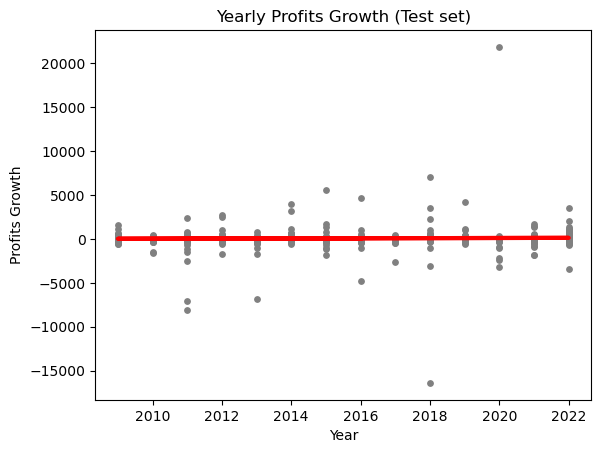

In [71]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X4_test, y4_test, color = 'grey', s = 15)
plot_test.plot(X4_test, y4_predicted, color = 'red', linewidth = 3)
plt.title('Yearly Profits Growth (Test set)')  
plt.xlabel('Year')  
plt.ylabel('Profits Growth')  
plt.show()

In [72]:
# Create objects that contain the model summary statistics

rmse4 = mean_squared_error(y4_test, y4_predicted) 
r4 = r2_score(y4_test, y4_predicted)

In [73]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression4.coef_)
print('Mean squared error: ', rmse4)
print('R2 score: ', r4)

Slope: [[7.68677725]]
Mean squared error:  613239.2321320348
R2 score:  -0.005771016890766534


The results are very similar to the first two models. It might not be a good fit to prove its model's accuracy.

In [74]:
y4_predicted

array([[46.93942071],
       [62.3129752 ],
       [46.93942071],
       ...,
       [31.56586621],
       [23.87908897],
       [77.6865297 ]])

In [75]:
# Create a dataframe comparing the actual and predicted values of y

data4 = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_predicted.flatten()})
data4.head(30)

,Actual,Predicted
0,66.751918,46.939421
1,-9.582389,62.312975
2,66.815145,46.939421
3,-14.313346,69.999752
4,-5.068226,62.312975
5,166.619916,123.807193
6,-92.187500,108.433639
7,-44.415584,39.252643
8,-22.344322,85.373307
9,-96.000000,31.565866


In [76]:
# Predict
# This is predicting X_train!

y4_predicted_train = regression4.predict(X4_train) 

In [77]:
# Create objects that contain the model summary statistics

rmse4 = mean_squared_error(y4_train, y4_predicted_train)
r4 = r2_score(y4_train, y4_predicted_train)

In [78]:
# Print the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression4.coef_)
print('Mean squared error: ', rmse4)
print('R2 score: ', r4)

Slope: [[7.68677725]]
Mean squared error:  2687738.1870589806
R2 score:  0.00034811165845050063


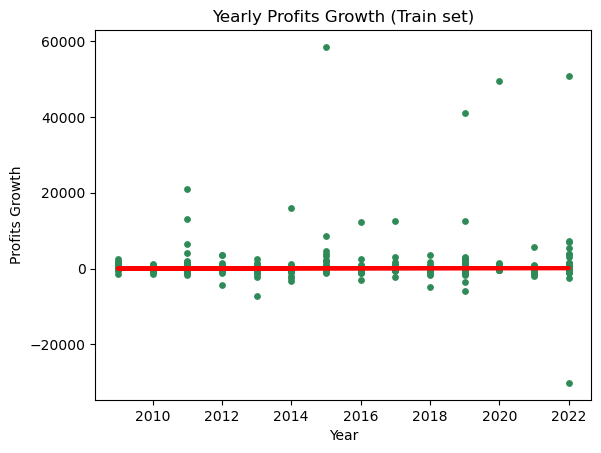

In [79]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X4_train, y4_train, color ='seagreen', s = 15)
plot_test.plot(X4_train, y4_predicted_train, color = 'red', linewidth = 3)
plt.title('Yearly Profits Growth (Train set)')  
plt.xlabel('Year')  
plt.ylabel('Profits Growth')  
plt.show()

**INTERPRETATION:** The model's performance is still not considered strong, and there is room for further improvement.

**YEAR vs. MARKET VALUE GROWTH**

`VARIABLES TO BE TESTED:`

X5 = Year  :  y5 = Market Value

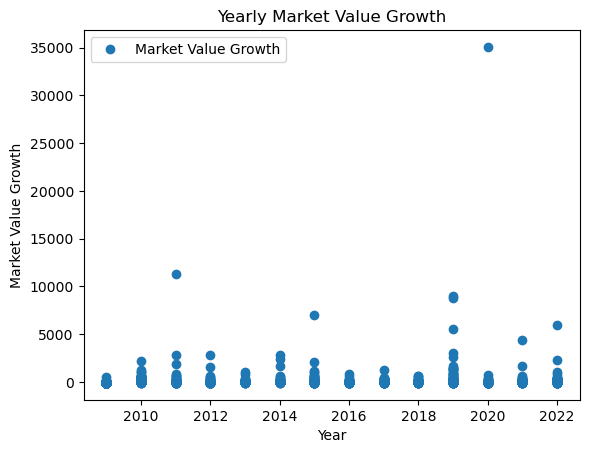

In [80]:
# Creating a  scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y = 'Market Value Growth', style = 'o')
plt.title('Yearly Market Value Growth')  
plt.xlabel('Year')  
plt.ylabel('Market Value Growth')  
plt.show()

In [81]:
# Reshape the variables and put them into separate objects.

X5 = df['Year'].values.reshape(-1,1)
y5 = df['Market Value Growth'].values.reshape(-1,1)

In [82]:
X5

array([[2009],
       [2009],
       [2009],
       ...,
       [2022],
       [2022],
       [2022]], dtype=int64)

In [83]:
y5

array([[-46.67645979],
       [-70.40520984],
       [-37.58865248],
       ...,
       [ -9.37346334],
       [  9.40585217],
       [  7.22062075]])

In [84]:
# Splitting data into a training set and a test set with the use of test_train_split

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.3, random_state = 0)

In [85]:
# Regression Analysis
# Creating a regression object

regression5 = LinearRegression()

In [86]:
# Fit the regression object onto the training set

regression5.fit(X5_train, y5_train)

LinearRegression()

In [87]:
# Predict the values of y using X.

y5_predicted = regression5.predict(X5_test)

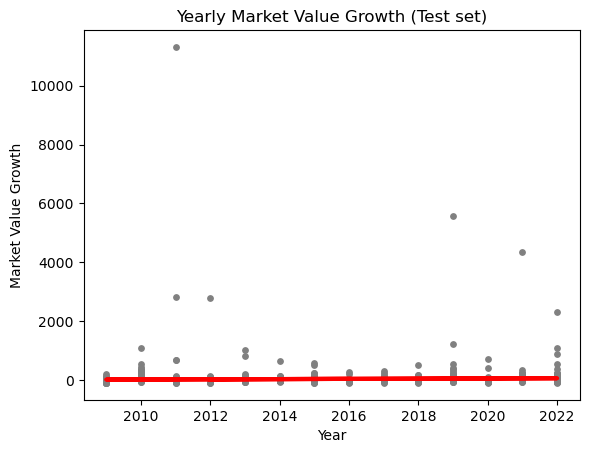

In [88]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X5_test, y5_test, color = 'grey', s = 15)
plot_test.plot(X5_test, y5_predicted, color = 'red', linewidth = 3)
plt.title('Yearly Market Value Growth (Test set)')  
plt.xlabel('Year')  
plt.ylabel('Market Value Growth')  
plt.show()

In [89]:
# Create objects that contain the model summary statistics

rmse5 = mean_squared_error(y5_test, y5_predicted) 
r5 = r2_score(y5_test, y5_predicted)

In [90]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression5.coef_)
print('Mean squared error: ', rmse5)
print('R2 score: ', r5)

Slope: [[3.54863664]]
Mean squared error:  101567.35973189244
R2 score:  -0.001578602303291099


**NOTE:** There are no significant differences from the first three models. The `high RSME` and `low R2 score` results suggests data point doesn't fit to perfrom accuracy.

In [91]:
y5_predicted

array([[24.70491781],
       [31.80219108],
       [24.70491781],
       ...,
       [17.60764453],
       [14.05900789],
       [38.89946436]])

In [92]:
# Create a dataframe comparing the actual and predicted values of y

data5 = pd.DataFrame({'Actual': y5_test.flatten(), 'Predicted': y5_predicted.flatten()})
data5.head(30)

,Actual,Predicted
0,46.321764,24.704918
1,0.722386,31.802191
2,-1.288917,24.704918
3,-35.469335,35.350828
4,-16.849140,31.802191
5,1076.755256,60.191284
6,-66.148382,53.094011
7,-34.646195,21.156281
8,40.578612,42.448101
9,32.646421,17.607645


In [93]:
# Predict
# This is predicting X_train!

y5_predicted_train = regression5.predict(X5_train) 

In [94]:
# Create objects that contain the model summary statistics

rmse5 = mean_squared_error(y5_train, y5_predicted_train)
r5 = r2_score(y5_train, y5_predicted_train)

In [95]:
# Print the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression5.coef_)
print('Mean squared error: ', rmse5)
print('R2 score: ', r5)

Slope: [[3.54863664]]
Mean squared error:  318607.40726250684
R2 score:  0.0006256962066776284


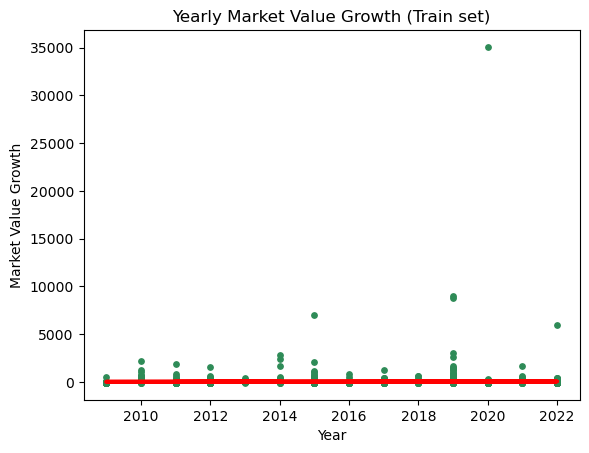

In [96]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X5_train, y5_train, color ='seagreen', s = 15)
plot_test.plot(X5_train, y5_predicted_train, color = 'red', linewidth = 3)
plt.title('Yearly Market Value Growth (Train set)')  
plt.xlabel('Year')  
plt.ylabel('Market Value Growth')  
plt.show()

**INTERPRETATION:** The model's performance results exhibit no significant changes, and the findings remain consistent.